### 网络科学理论
***
***
# 网络科学：使用NetworkX分析复杂网络
***
***

刘琪琪 MG1814010 信息管理学院

### https://networkx.github.io/documentation/networkx-1.10/overview.html
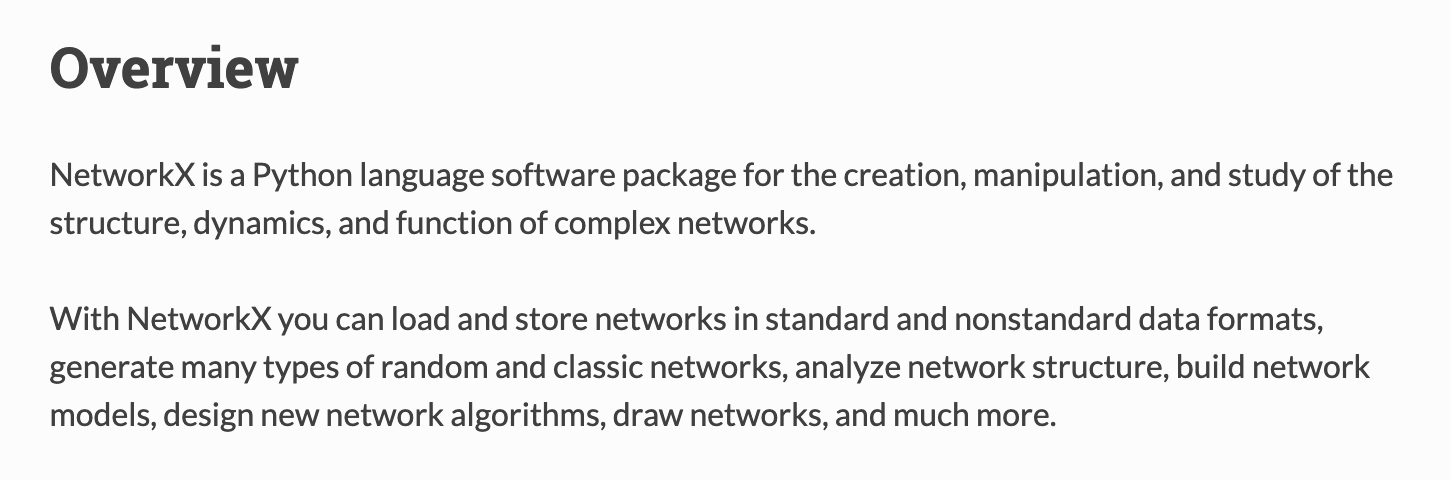

In [10]:
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [11]:
G=nx.Graph() # G = nx.DiGraph() # 有向网络
# 添加（孤立）节点
G.add_node("spam")
# 添加节点和链接
G.add_edge(1,2)

print(G.nodes())

print(G.edges())

['spam', 1, 2]
[(1, 2)]


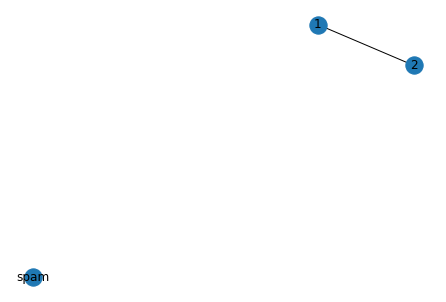

In [12]:
nx.draw(G, with_labels = True)

### 任务一
### 下载www数据
### 构建networkx的网络对象g（提示：有向网络）
### 将www数据添加到g当中
### 计算网络中的节点数量和链接数量

In [1]:
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [7]:
G = nx.DiGraph() #DiGraph为有向图
n = 0
with open ('www.dat.gz.txt') as f:
    for line in f:
        n += 1
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)
print(nx.info(G))#打印网络信息

Name: 
Type: DiGraph
Number of nodes: 325729
Number of edges: 1497134
Average in degree:   4.5963
Average out degree:   4.5963


# 描述网络
### nx.karate_club_graph

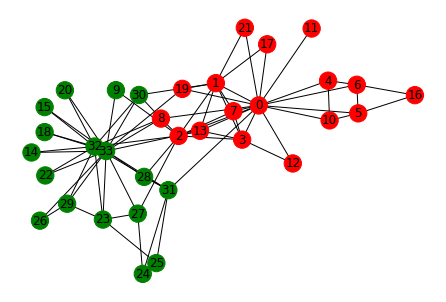

In [26]:
G = nx.karate_club_graph()
 
clubs = [G.node[i]['club'] for i in G.nodes()]
colors = []
for j in clubs:
    if j == 'Mr. Hi':
        colors.append('r')
    else:
        colors.append('g')
 

nx.draw(G,  with_labels = True, node_color = colors)

In [14]:
G.node[1], G.node[9] # 节点1的属性 # 节点1的属性

({'club': 'Mr. Hi'}, {'club': 'Officer'})

In [15]:
G.edges# 前三条边的id
#dir(G)

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [17]:
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [18]:
list(G.nodes())[:3] #G中前三个节点 

[0, 1, 2]

In [19]:
list(G.edges())[:3] #G中前三条边 

[(0, 1), (0, 2), (0, 3)]

In [20]:
print(*G.neighbors(1))# 节点1的邻接节点

0 2 3 7 13 17 19 21 30


In [21]:
nx.average_shortest_path_length(G) #平均最短路径长度

2.408199643493761

### 网络直径

In [22]:
nx.diameter(G)#返回图G的直径

5

### 密度

In [23]:
nx.density(G)#karate_club_graph密度

0.13903743315508021

In [27]:
nodeNum = len(G.nodes())
edgeNum = len(G.edges())

2.0*edgeNum/(nodeNum * (nodeNum - 1))# 密度计算方法

0.13903743315508021

### 聚集系数

In [28]:
cc = nx.clustering(G)
cc.items()

dict_items([(0, 0.15), (1, 0.3333333333333333), (2, 0.24444444444444444), (3, 0.6666666666666666), (4, 0.6666666666666666), (5, 0.5), (6, 0.5), (7, 1.0), (8, 0.5), (9, 0), (10, 0.6666666666666666), (11, 0), (12, 1.0), (13, 0.6), (14, 1.0), (15, 1.0), (16, 1.0), (17, 1.0), (18, 1.0), (19, 0.3333333333333333), (20, 1.0), (21, 1.0), (22, 1.0), (23, 0.4), (24, 0.3333333333333333), (25, 0.3333333333333333), (26, 1.0), (27, 0.16666666666666666), (28, 0.3333333333333333), (29, 0.6666666666666666), (30, 0.5), (31, 0.2), (32, 0.19696969696969696), (33, 0.11029411764705882)])

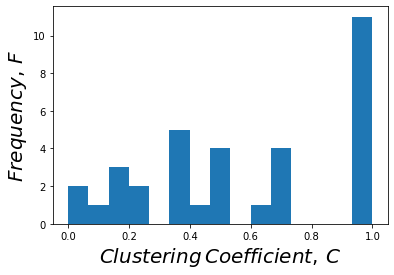

In [29]:
plt.hist(cc.values(), bins = 15)
plt.xlabel('$Clustering \, Coefficient, \, C$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)
plt.show()

### 匹配系数

In [30]:
# M. E. J. Newman, Mixing patterns in networks Physical Review E, 67 026126, 2003
nx.degree_assortativity_coefficient(G) #计算一个图的度匹配性。

-0.47561309768461457

1.0


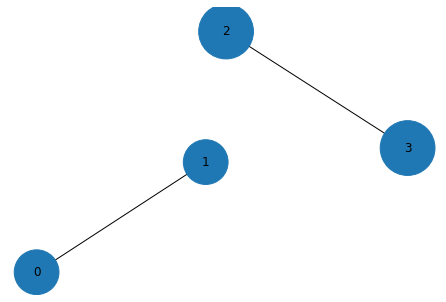

In [31]:
Ge=nx.Graph()
Ge.add_nodes_from([0,1],size=2)
Ge.add_nodes_from([2,3],size=3)
Ge.add_edges_from([(0,1),(2,3)])
node_size = [list(Ge.node[i].values())[0]*1000 for i in Ge.nodes()]
nx.draw(Ge, with_labels = True, node_size = node_size)

print(nx.numeric_assortativity_coefficient(Ge,'size')) 

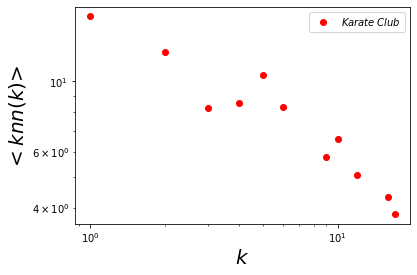

In [32]:
# plot degree correlation  
from collections import defaultdict
import numpy as np

l=defaultdict(list)
g = nx.karate_club_graph()

for i in g.nodes():
    k = []
    for j in g.neighbors(i):
        k.append(g.degree(j))
    l[g.degree(i)].append(np.mean(k))   
    #l.append([g.degree(i),np.mean(k)])
  
x = list(l.keys())
y = [np.mean(i) for i in l.values()]

#x, y = np.array(l).T
plt.plot(x, y, 'ro', label = '$Karate\;Club$')
plt.legend(loc=1,fontsize=10, numpoints=1)
plt.xscale('log'); plt.yscale('log')
plt.ylabel(r'$<knn(k)$> ', fontsize = 20)
plt.xlabel('$k$', fontsize = 20)
plt.show()

# Degree centrality measures.（度中心性）
* degree_centrality(G)        # Compute the degree centrality for nodes.
* in_degree_centrality(G)     # Compute the in-degree centrality for nodes.
* out_degree_centrality(G)    # Compute the out-degree centrality for nodes.
* closeness_centrality(G[, v, weighted_edges])   #  Compute closeness centrality for nodes.
* betweenness_centrality(G[, normalized, ...])  #  Betweenness centrality measures.（介数中心性）

In [33]:
dc = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness= nx.betweenness_centrality(G)

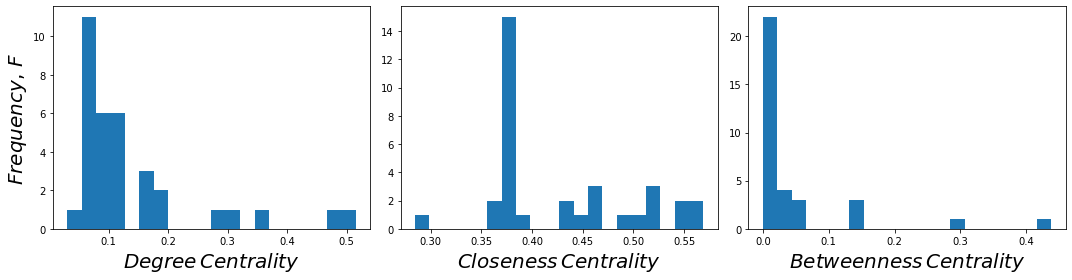

In [34]:
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.hist(dc.values(), bins = 20)
plt.xlabel('$Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.hist(closeness.values(), bins = 20)
plt.xlabel('$Closeness \, Centrality$', fontsize = 20)

ax = plt.subplot(1, 3, 3)
plt.hist(betweenness.values(), bins = 20)
plt.xlabel('$Betweenness \, Centrality$', fontsize = 20)
plt.tight_layout()
plt.show()

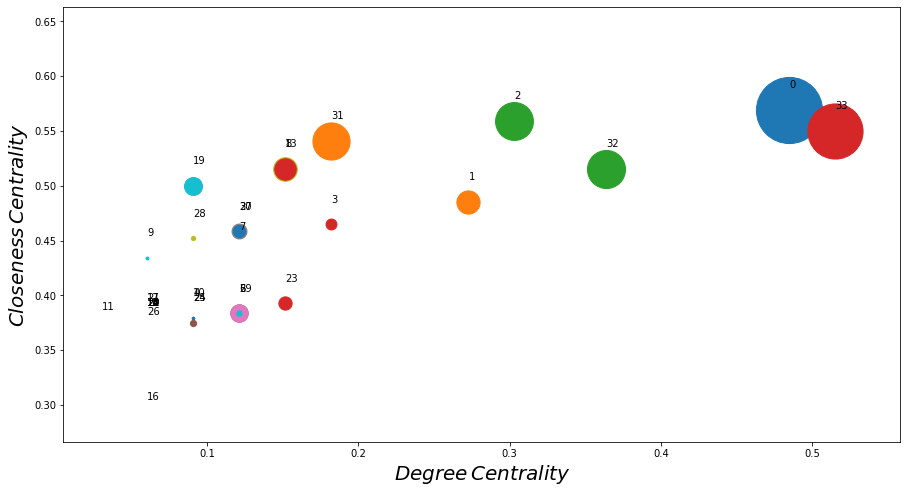

In [35]:
fig = plt.figure(figsize=(15, 8),facecolor='white')

for k in betweenness:
    plt.scatter(dc[k], closeness[k], s = betweenness[k]*10000)
    plt.text(dc[k], closeness[k]+0.02, str(k))
plt.xlabel('$Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Closeness \, Centrality$', fontsize = 20)
plt.show()

# 度分布

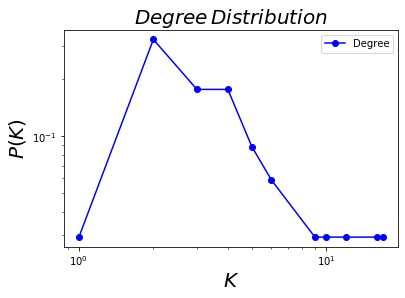

In [38]:
from collections import defaultdict
import numpy as np

def plotDegreeDistribution(G):
    degs = defaultdict(int)
    for i in dict(G.degree()).values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P(K)$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()   
    
G = nx.karate_club_graph()     
plotDegreeDistribution(G)

# 规则网络

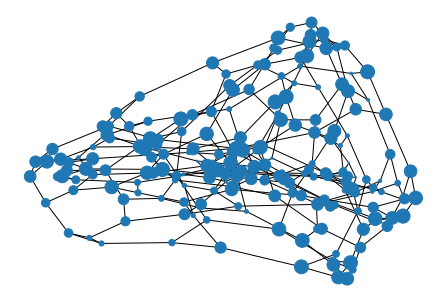

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
RG = nx.random_graphs.random_regular_graph(3,200)  
#生成包含200个节点、 每个节点有3个邻居的规则图RG
pos = nx.spectral_layout(RG)          
#定义一个布局，此处采用了spectral布局方式，后变还会介绍其它布局方式，注意图形上的区别
nx.draw(RG,pos,with_labels=False,node_size = range(1, 201))  
#绘制规则图的图形，with_labels决定节点是非带标签（编号），node_size是节点的直径
plt.show()  #显示图形

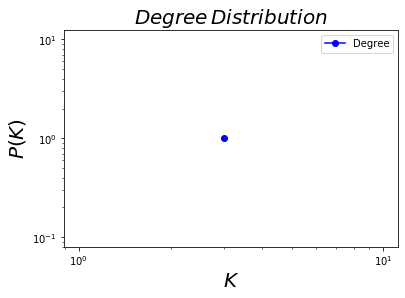

In [40]:
plotDegreeDistribution(RG)

# ER随机网络

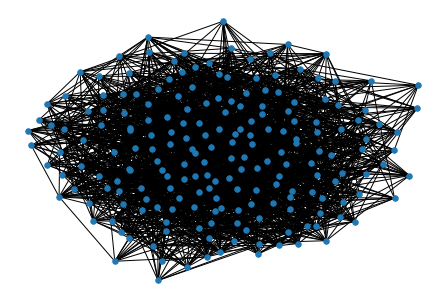

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
ER = nx.random_graphs.erdos_renyi_graph(200,0.1)  
#生成包含200个节点、以概率0.2连接的随机图
pos = nx.spring_layout(ER)          
#定义一个布局，此处采用了shell布局方式
nx.draw(ER,pos,with_labels=False,node_size = 30) 
plt.show()

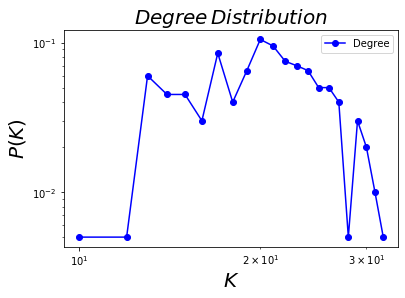

In [42]:
#ER = nx.random_graphs.erdos_renyi_graph(2000,0.1)  
plotDegreeDistribution(ER)

# 小世界网络

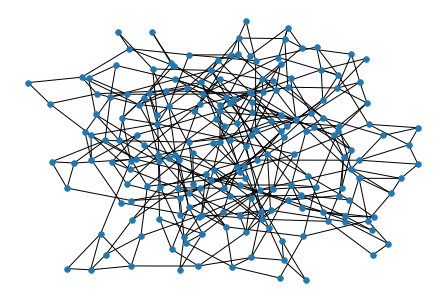

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
WS = nx.random_graphs.watts_strogatz_graph(200,4,0.3)  
#生成包含200个节点、每个节点4个近邻、随机化重连概率为0.3的小世界网络
pos = nx.spring_layout(WS)          
#定义一个布局，此处采用了circular布局方式
nx.draw(WS,pos,with_labels=False,node_size = 30)  
#绘制图形
plt.show()

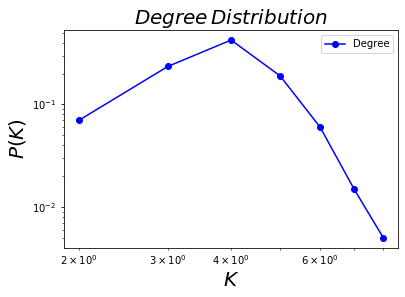

In [44]:
plotDegreeDistribution(WS)

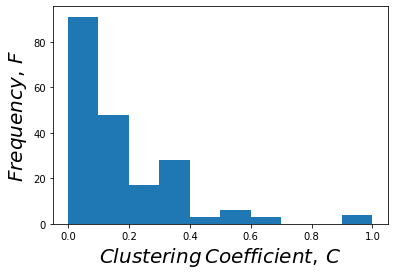

In [46]:
cc = nx.clustering(WS)
plt.hist(cc.values(), bins = 10)
plt.xlabel('$Clustering \, Coefficient, \, C$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)
plt.show()

In [47]:
import numpy as np
np.mean(list(cc.values()))

0.15327380952380953

# BA网络

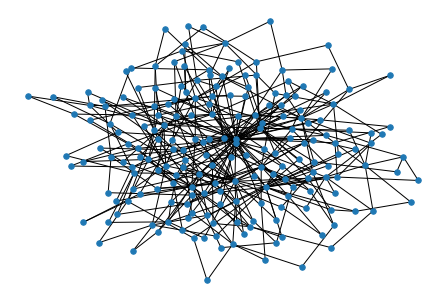

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
BA= nx.random_graphs.barabasi_albert_graph(200,2)  
#生成n=200、m=2的BA无标度网络
pos = nx.spring_layout(BA)          
#定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  
#绘制图形
plt.show()

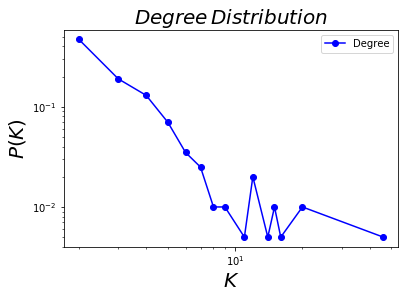

In [49]:
plotDegreeDistribution(BA)

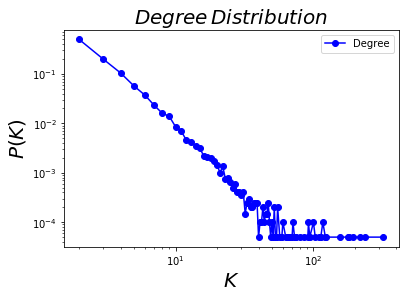

In [50]:
BA= nx.random_graphs.barabasi_albert_graph(20000,2)  
#生成n=20000、m=2的BA无标度网络
plotDegreeDistribution(BA)

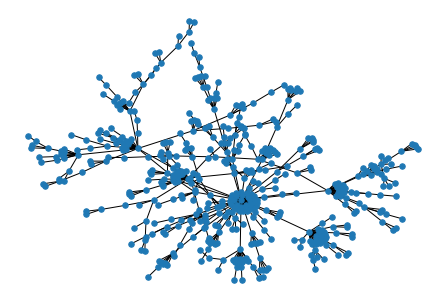

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
BA= nx.random_graphs.barabasi_albert_graph(500,1)  
#生成n=500、m=1的BA无标度网络
pos = nx.spring_layout(BA)          
#定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  
#绘制图形
plt.show()

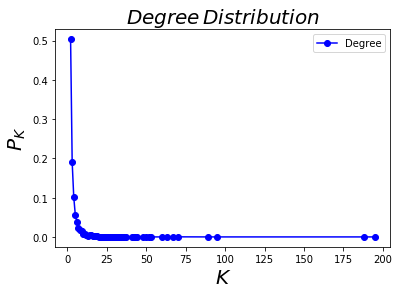

In [52]:
from collections import defaultdict
import numpy as np
def plotDegreeDistributionLongTail(G):
    degs = defaultdict(int)
    for i in list(dict(G.degree()).values()): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P_K$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()  
    
BA= nx.random_graphs.barabasi_albert_graph(5000,2)  
#生成n=5000、m=2的BA无标度网络    
plotDegreeDistributionLongTail(BA)#长尾效应

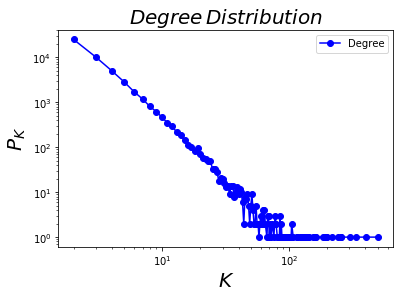

In [53]:
def plotDegreeDistribution(G):
    degs = defaultdict(int)
    for i in list(dict(G.degree()).values()): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    x, y = np.array(items).T
    y_sum = np.sum(y)
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P_K$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()   

BA= nx.random_graphs.barabasi_albert_graph(50000,2)  
#生成n=20、m=1的BA无标度网络        
plotDegreeDistribution(BA)

### 任务二
### 计算www网络的网络密度

In [24]:
G = nx.DiGraph() #DiGraph为有向图
with open ('www.dat.gz.txt') as f:
    for line in f:
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)
print(nx.density(G))

1.4110719364589702e-05


### 任务三
### 绘制www网络的出度分布、入度分布
### 使用BA模型生成节点数为N、幂指数为 𝛾 的网络 
### 计算平均路径长度d与节点数量的关系

In [9]:
from collections import defaultdict
import numpy as np

In [14]:
def plotInOutDegreeDistribution(G):
    """
    画有向图G的入度和出度分布 渲染在同一个图中
    """
    in_degs = defaultdict(int)
    out_degs = defaultdict(int)
    for i in dict(nx.in_degree_centrality(G)).values(): in_degs[i]+=1
    for i in dict(nx.out_degree_centrality(G)).values(): out_degs[i]+=1
    fig = plt.figure(figsize=(25, 5),facecolor='white')
    a_fig = plt.subplot(1,2,1)
    items = sorted ( in_degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['InDegree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P(K)$', fontsize = 20)
    plt.title('$InDegree\,Distribution$', fontsize = 20)
    b_fig = plt.subplot(1,2,2)
    items = sorted ( out_degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['OutDegree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P(K)$', fontsize = 20)
    plt.title('$OutDegree\,Distribution$', fontsize = 20)
    plt.show()

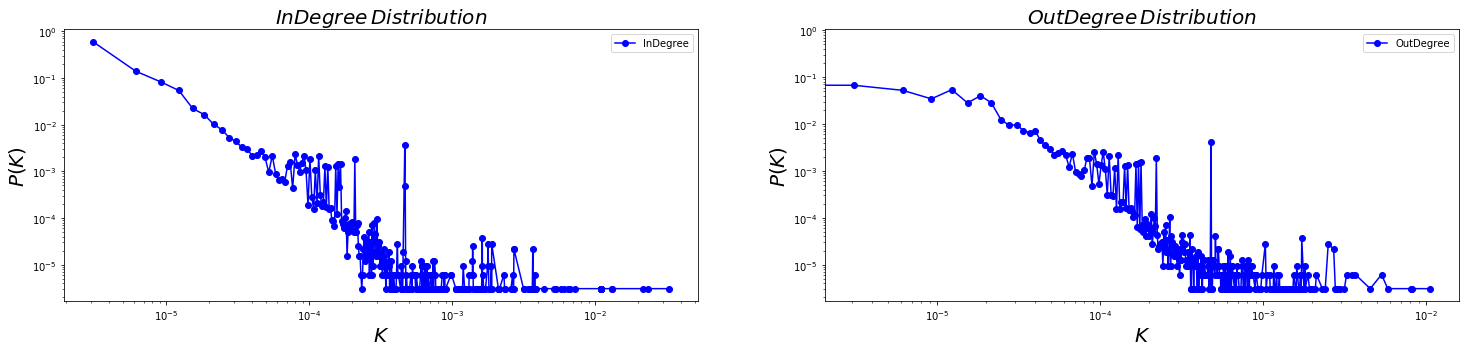

In [15]:
plotInOutDegreeDistribution(G)

spend time: 108.40245199203491 s


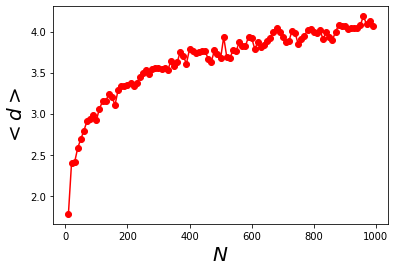

In [16]:
import time
Ns = [i*10 for i in range(1,100)] #节点数为10、20、30……1000
ds = []
start = time.time()
for N in Ns:
    #print(N)
    BA= nx.random_graphs.barabasi_albert_graph(N,2)#生成节点数为N，加入节点时生成边为2的BA图
    d = nx.average_shortest_path_length(BA) #计算BA图的平均路径长度
    ds.append(d)
end = time.time()
print("spend time:",end - start,"s")#计算程序
plt.plot(Ns, ds, 'r-o')
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('$<d>$', fontsize = 20)
#plt.xscale('log')
plt.show()

# Thank you！